#Algorithmic Toolbox – Week 3 – Greedy

##3-1: Money Change

In [ ]:
#include <iostream>

using namespace std;

int money_change(int m){
    int ten_coins = m / 10;
    int five_coins = (m % 10) / 5;
    int one_coins = ((m % 10) % 5) / 1;
    return ten_coins + five_coins + one_coins;
}

int main(){
    int m;
    cin >> m;
    cout << money_change(m) << endl;
    return 0;
}

##3-2: Maximum Value of the Loot

In [ ]:
#include <iostream>

using namespace std;

void swap(int* a, int* b){ 
    int temp = *a; 
    *a = *b; 
    *b = temp; 
} 

int partition (int* Vx, int* Wx, int start, int end){ 
    double pivot = ((double)*(Vx + end)) / *(Wx + end);
    int i = start - 1;
    for (int j = start; j <= end - 1; j++) { 
        if (((double)*(Vx + j)) / *(Wx + j) < pivot) { 
            i++;
            swap(Vx + i, Vx + j);
            swap(Wx + i, Wx + j);
        } 
    } 
    swap(Vx + i + 1, Vx + end); 
    swap(Wx + i + 1, Wx + end); 
    return i + 1; 
} 


void quicksort(int* Vx, int* Wx, int start, int end){
    if (start < end) { 
        int index = partition(Vx, Wx, start, end); 
        quicksort(Vx, Wx, start, index - 1); 
        quicksort(Vx, Wx, index + 1, end); 
    } 
}


double maximum_value_of_the_loot(int n, int W, int* Vx, int* Wx){
    quicksort(Vx, Wx, 0, n - 1);
    int v_acum = 0;
    int w_acum = 0;
    int i = n - 1;
    while(i >= 0 && w_acum + *(Wx + i) <= W){
        v_acum += *(Vx + i);
        w_acum += *(Wx + i);
        i--;
    }
    if(i >= 0){
        return v_acum + (*(Vx + i) * (W - w_acum)) / (double)*(Wx + i);
    }else{
        return v_acum;
    }
}


int main(){
    int n, W;
    cin >> n >> W;
    int* Vx = (int*) malloc(sizeof(int) * n);
    int* Wx = (int*) malloc(sizeof(int) * n);
    for(int i = 0; i < n; i++){
        cin >> *(Vx + i) >> *(Wx + i);
    }
    cout.precision(10);
    cout << maximum_value_of_the_loot(n, W, Vx, Wx) << endl;
    free(Vx);
    free(Wx);
    return 0;
}

##3-3: Car Fueling

In [ ]:
#include <iostream>

using namespace std;

int car_fueling(int m, int n, int* stops){
    int i = 0;
    int count = 0;
    while(i <= n){
        int i_1 = i;
        while(i <= n && *(stops + i + 1) - *(stops + i_1) <= m){
            i++;
        }
        if(i_1 == i){
            return -1;
        }
        if(i <= n){
            count ++;
        }
    }
    return count;
    
}

int main(){
    int d;
    cin >> d;
    int m;
    cin >> m;
    int n;
    cin >> n;
    int* stops = (int*) malloc(sizeof(int) * (n + 2));
    *(stops + 0) = 0;
    for(int i = 1; i <= n; i++){
        cin >> *(stops + i);
    }
    *(stops + n + 1) = d;
    cout << car_fueling(m, n, stops) << endl;
    free(stops);
    return 0;
}

##3-4: Maximum Advertisement Revenue

In [ ]:
#include <iostream>

using namespace std;

void swap(int* a, int* b){ 
    int temp = *a; 
    *a = *b; 
    *b = temp; 
} 

int partition (int* A, int start, int end){ 
    int pivot = *(A + end);
    int i = start - 1;
    for (int j = start; j <= end - 1; j++) { 
        if (*(A + j) < pivot) { 
            i++;
            swap(A + i, A + j);
        } 
    } 
    swap(A + i + 1, A + end); 
    return i + 1; 
} 


void quicksort(int* A, int start, int end){
    if (start < end) { 
        int index = partition(A, start, end); 
        quicksort(A, start, index - 1); 
        quicksort(A, index + 1, end); 
    } 
}

long long maximum_advertisement_revenue(int* A, int* B, int n){
    quicksort(A, 0, n - 1);
    quicksort(B, 0, n - 1);
    long long sum = 0;
    for(int i = 0; i < n; i++){
        sum += ((long long)*(A + i)) * *(B + i);
    }
    return sum;
}

int main(){
    int n;
    cin >> n;
    int* A = (int*) malloc(sizeof(int) * n);
    int* B = (int*) malloc(sizeof(int) * n);
    for(int i = 0; i < n; i++){
        cin >> *(A + i);
    }
    for(int i = 0; i < n; i++){
        cin >> *(B + i);
    }
    cout << maximum_advertisement_revenue(A, B, n) << endl;
    return 0;
}

##3-5: Collecting Signatures

In [ ]:
#include <bits/stdc++.h>

using namespace std;

void collecting_signatures(vector<pair<int, int>> &segments){
    sort(segments.rbegin(), segments.rend());
    queue<int> positions;
    pair<int, int> segment;
    int end_of_interval;
    while(segments.size() > 0){
        segment = segments.back();
        end_of_interval = segment.second;
        while(segment.first <= end_of_interval){
            segments.pop_back();
            if(segment.second < end_of_interval){
                end_of_interval = segment.second;
            }
            if(segments.size() < 1){
                break;
            }
            segment = segments.back();
        }
        positions.push(end_of_interval);
    }

    int n = positions.size();

    cout << n << endl;

    for(int i = 0; i < n; i++){
        cout << positions.front() << ' ';
        positions.pop();
    }

    cout << endl;

}


int main(){
    int n;
    cin >> n;
    vector<pair<int, int>> segments(n);
    sizeof(segments);
    for(int i = 0; i < n; i++){
        cin >> segments[i].first >> segments[i].second;
    }
    collecting_signatures(segments);
    return 0;
}

##3-6: Maximum Number of Prizes

In [ ]:
#include <bits/stdc++.h>

using namespace std;

void maximum_number_of_prizes(int n){
    queue<int> prizes;

    int count = 1;
    int acum = 0;
    
    while(n - (acum + count) > count){
        prizes.push(count);
        acum += count;
        count++;
    }

    prizes.push(n - acum);

    int size = prizes.size();
    cout << size << endl;

    for(int i = 0; i < size; i++){
        cout << prizes.front() << ' ';
        prizes.pop(); 
    }

    cout << endl;
}


int main(){
    int n;
    cin >> n;
    maximum_number_of_prizes(n);
    return 0;
}

##3-7: Maximum Salary

In [ ]:
#include <bits/stdc++.h>

using namespace std;

int higer_value(string a, string b){
    int ab = atoi((a + b).c_str());
    int ba = atoi((b + a).c_str());
    return ab > ba ? 1 : 0;
}

void maximum_salary(vector<string> &numbers, int n){
    sort(numbers.begin(), numbers.end(), higer_value);
    for(int i = 0; i < n; i++){
        cout << numbers[i];
    }
    cout << endl;
}

int main(){
    int n;
    cin >> n;
    vector<string> numbers(n);
    for(int i = 0; i < n; i++){
        cin >> numbers[i];
    }
    maximum_salary(numbers, n);

    return 0;
}

##Juez Virtual Coursera

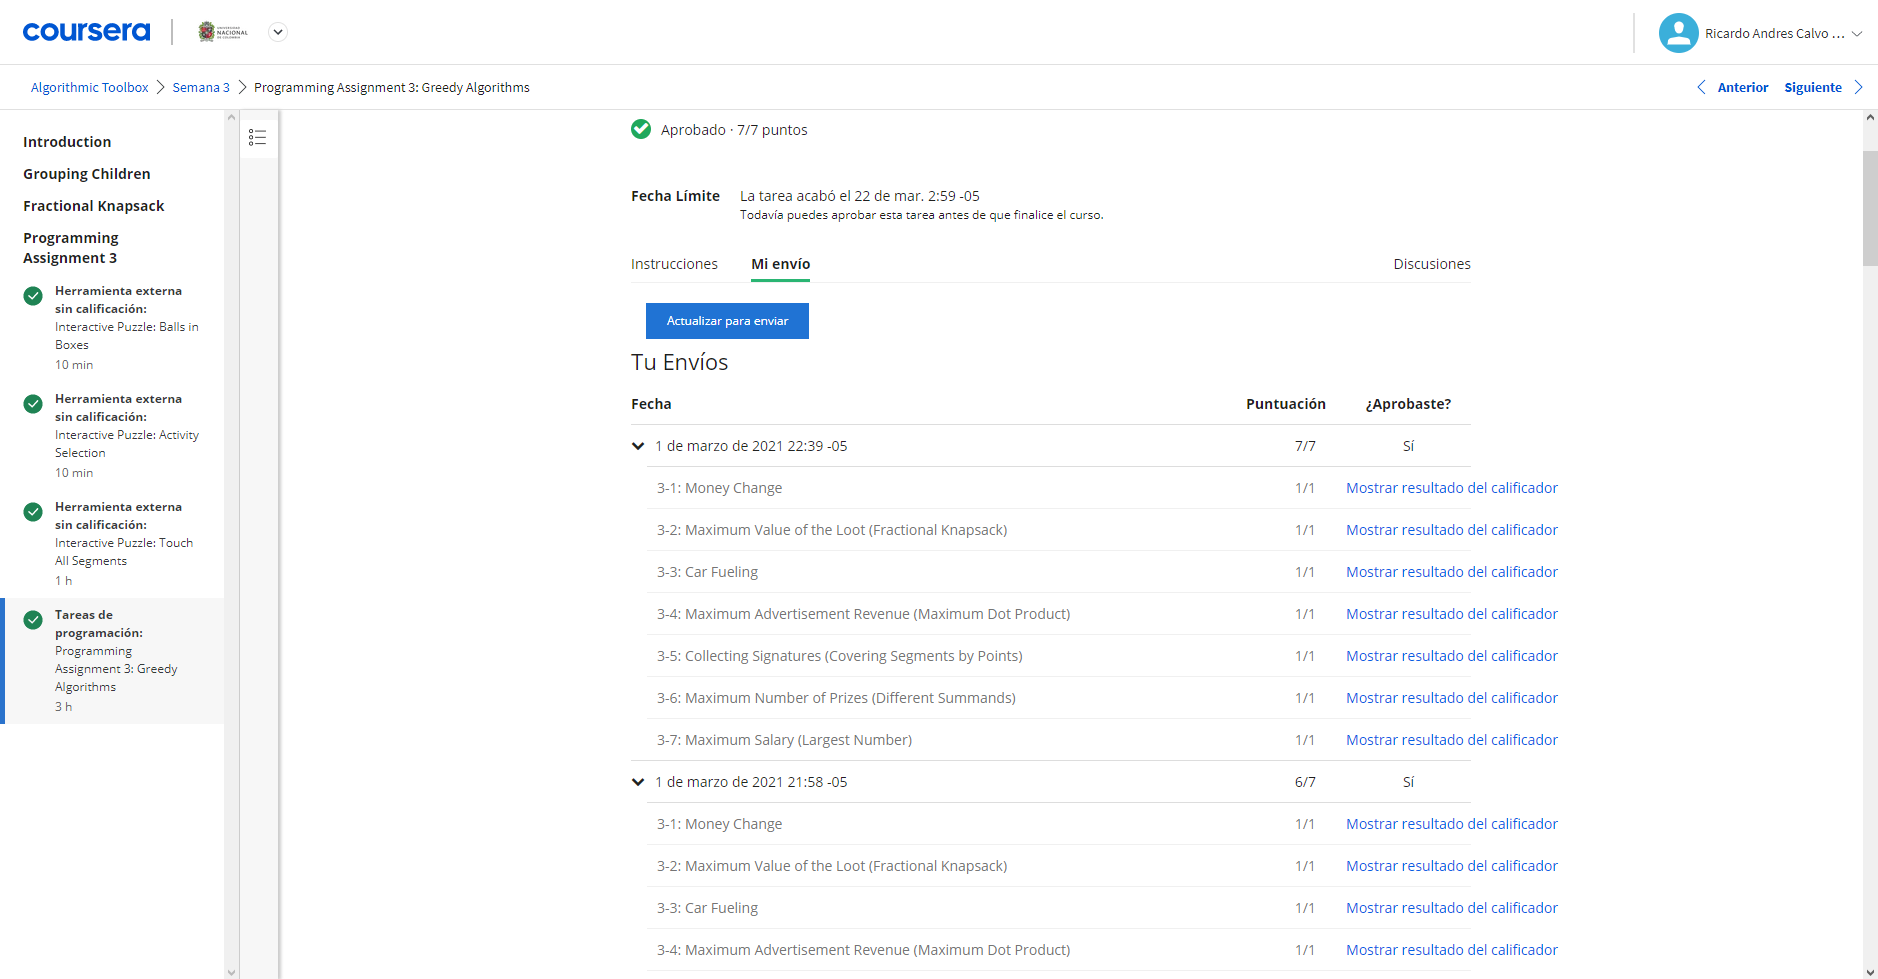